## Lab 2 

In [1]:
# lägg till inititala moduler/paket 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import cv2
import os



In [5]:
# start EDA

data_path = Path().absolute() / "original_data"
data_path_test=data_path / "test/test"
data_path_train=data_path / "train/train"
print(f"{data_path_test=}")
print(f"{data_path_train=}")

# test 1.jpg - 12500.jpg
# train  cat0.jpg - cat12499.jpg, dog0-12499.jpg



data_path_test=WindowsPath('c:/Source/AI-deep_learning/original_data/test/test')
data_path_train=WindowsPath('c:/Source/AI-deep_learning/original_data/train/train')


type(image) = <class 'numpy.ndarray'>
image.shape = (199, 187, 3)


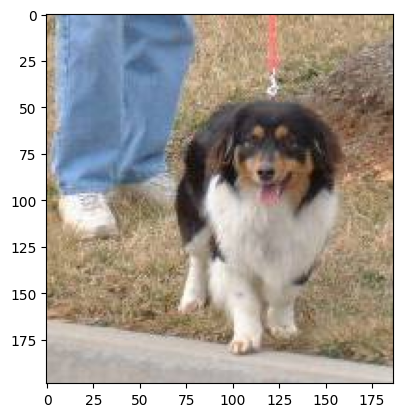

In [17]:
image = plt.imread(data_path_train / "dog.2.jpg")

print(f"{type(image) = }")
# the last dimension indicates that its colors and in 
# open cv it is actually BGR and not RGB 
print(f"{image.shape = }")
min(image.flatten()), max(image.flatten()) 

plt.imshow(image)

Läs in 10 bilder slumpmässigt, plotta dem och extrahera deras labels och skriv ut i titeln.

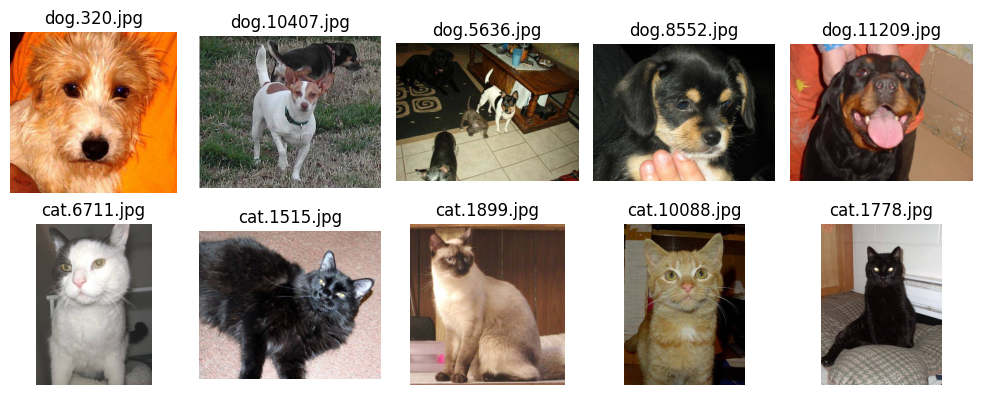

In [168]:
# Funktion för att skapa unika index (till bilder), inspiration från Stack Overflow
# equalizing size to similar
size_x=80
size_y=80

def createImageIndexList(number, start=1, end=100, typeofimage="dog"):   
    pulled_im = []
    label_im=[]
    arr = np.random.choice(np.arange(start, end + 1), size=number, replace=False)
    for index in arr:
        image = typeofimage+ "." + str(index) + ".jpg"
        label_im.append(image)
        what=plt.imread(data_path_train / image)
        # pulled_im.append(cv2.resize(what,(size_x, size_y)))
        pulled_im.append(what)
    return pulled_im, label_im
 
# obtain images of dogs and cats
# train  cat0.jpg - cat12499.jpg, dog0-12499.jpg
dog_images, dog_labels=createImageIndexList(5, 0, 12499, "dog") 
cat_images, cat_labels=createImageIndexList(5, 0, 12499, "cat")

ten_images=dog_images + cat_images
ten_labels=dog_labels + cat_labels
#print(createImageIndexList(5))

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    # resized_image = cv2.resize(image, new_size)
    ax.imshow(ten_images[i])
    ax.axis("off")
    ax.set_title(f"{ten_labels[i]}")
fig.tight_layout()


 Skapa folderstrukturen nedan med Python:
 .
├── experiment_small_data
│   ├── test
│   ├── train
│   └── val
├── experiment_tiny_data
│   ├── test
│   ├── train
│   └── val
├── lab.ipynb 
└── original_data
 ├── test
 │   └── test
 └── train
     └── train

In [51]:
# with som influence from Stack Overflow

def create_folderstruct(main_folder):
    path = Path(main_folder)
    # Check whether the specified path exists or not
    isExist = os.path.exists(path)
    if not isExist:
        # Create a new directory because it does not exist
        os.makedirs(path)
        os.mkdir(path / "test")
        os.mkdir(path / "train")
        os.mkdir(path / "val")
        print("The new directory is created!")

create_folderstruct("experiment_small_data")
create_folderstruct("experiment_tiny_data")


The new directory is created!


train|val|test split med följande splits:
    experiment_small
        train - 1600 (800 dogs, 800 cats)
        val - 400 (200 dogs, 200 cats)
        test - 500 (250 dogs, 250 cats)
    experiment_tiny (BONUS)
        train - 160 (80 dogs, 80 cats)
        val - 40 (20 dogs, 20 cats)
        test - 50 (25 dogs, 25 cats)
Det är inte så farligt om det inte blir exakt balanserade dataset.
Det är viktigt att du samplar slumpmässigt utan replacement från originaldatasetet under respektive
experiment. Spara datan i deras respektive mappar.

Experiment small - split och spara data

In [100]:
from sklearn.model_selection import train_test_split
import pickle

# experimental small
dog_images, dog_labels=createImageIndexList(1250, 0, 12499, "dog") 
cat_images, cat_labels=createImageIndexList(1250, 0, 12499, "cat")

# initial split - obs x_test och y_test måste sättas om till 1 (dog) resp 0 (cat) 

train_label_dogs=["Dog" for i in dog_labels]
train_label_cats=["Cat" for i in cat_labels]

X_train_dogs, X_test_dogs, y_train_dogs, y_test_dogs = train_test_split(
    dog_images, train_label_dogs, test_size=0.2, random_state=42)

# split X_train så vi får ett validerings set
X_train2_dogs, X_val_dogs, y_train2_dogs, y_val_dogs = train_test_split(
    X_train_dogs, y_train_dogs, test_size=0.2, random_state=42)


X_train_cats, X_test_cats, y_train_cats, y_test_cats = train_test_split(
    cat_images, train_label_cats, test_size=0.2, random_state=42)

# split X_train så vi får ett validerings set
X_train2_cats, X_val_cats, y_train2_cats, y_val_cats = train_test_split(
    X_train_cats, y_train_cats, test_size=0.2, random_state=42)

# merge dogs and cats data, full set
X_train=X_train_dogs + X_train_cats
y_train = y_train_dogs + y_train_cats
X_test=X_test_dogs + X_test_cats
y_test = y_test_dogs + y_test_cats
# tuning sets
X_train2=X_train2_dogs + X_train2_cats
y_train2=y_train2_dogs + y_train2_dogs
X_val=X_val_dogs + X_val_cats
y_val=y_val_dogs + y_val_cats
# Funktion för att spara datan
def save_data(pathfile, the_data):
    f = open(pathfile, 'wb')
    pickle.dump(the_data, f)
    f.close()


save_data("experiment_small_data/train/train.dat", [X_train, y_train])
save_data("experiment_small_data/test/test.dat",[X_test, y_test])
save_data("experiment_small_data/train/train2.dat",[X_train2, y_train2])
save_data("experiment_small_data/val/validate.dat",[X_val, y_val])


Tiny data split och spara 

In [101]:
# experimental tiny
dog_images, dog_labels=createImageIndexList(125, 0, 12499, "dog") 
cat_images, cat_labels=createImageIndexList(125, 0, 12499, "cat")

# initial split - obs x_test och y_test måste sättas om till 1 (dog) resp 0 (cat) 

train_label_dogs=["Dog" for i in dog_labels]
train_label_cats=["Cat" for i in cat_labels]

X_train_dogs, X_test_dogs, y_train_dogs, y_test_dogs = train_test_split(
    dog_images, train_label_dogs, test_size=0.2, random_state=42)

# split X_train så vi får ett validerings set
X_train2_dogs, X_val_dogs, y_train2_dogs, y_val_dogs = train_test_split(
    X_train_dogs, y_train_dogs, test_size=0.2, random_state=42)


X_train_cats, X_test_cats, y_train_cats, y_test_cats = train_test_split(
    cat_images, train_label_cats, test_size=0.2, random_state=42)

# split X_train så vi får ett validerings set
X_train2_cats, X_val_cats, y_train2_cats, y_val_cats = train_test_split(
    X_train_cats, y_train_cats, test_size=0.2, random_state=42)

# merge dogs and cats data, full set
X_train=X_train_dogs + X_train_cats
y_train = y_train_dogs + y_train_cats
X_test=X_test_dogs + X_test_cats
y_test = y_test_dogs + y_test_cats
# tuning sets
X_train2=X_train2_dogs + X_train2_cats
y_train2=y_train2_dogs + y_train2_dogs
X_val=X_val_dogs + X_val_cats
y_val=y_val_dogs + y_val_cats



save_data("experiment_tiny_data/train/train.dat", [X_train, y_train])
save_data("experiment_tiny_data/test/test.dat",[X_test, y_test])
save_data("experiment_tiny_data/train/train2.dat",[X_train2, y_train2])
save_data("experiment_tiny_data/val/validate.dat",[X_val, y_val])


Läs in dataseten från experiment_small, experiment_tiny (BONUS) och plocka ut labelsvektorer, som ska vara one-hot encoded med 0 och 1.

Experiment small - läsa data

In [157]:
# Funktion för att läsa data
def load_data(pathfile):
    f = open(pathfile, 'rb')
    obj1, obj2 = pickle.load(f)
    f.close()
    arr = np.random.choice(np.arange(0, len(obj1)), size=len(obj1), replace=False)
    obj3=[obj1[i] for i in arr]
    obj4=[obj2[i] for i in arr]
    return [obj3, obj4]

# Läs in data till variabler
X_train, y_train=load_data("experiment_small_data/train/train.dat")
X_test, y_test=load_data("experiment_small_data/test/test.dat")
X_train2, y_train2 =load_data("experiment_small_data/train/train2.dat")
X_val, y_val=load_data("experiment_small_data/val/validate.dat")

X_train_tiny, y_train_tiny=load_data("experiment_tiny_data/train/train.dat", )
X_test_tiny, y_test_tiny=load_data("experiment_tiny_data/test/test.dat")
X_train2_tiny, y_train2_tiny=load_data("experiment_tiny_data/train/train2.dat")
X_val_tiny, y_val_tiny=load_data("experiment_tiny_data/val/validate.dat")


2000
2000
500
500
1600
1600
400
400
200
200
50
50
160
160
40
40


Ändra till one hot encoding för label vektorer (y_xxxx)

In [159]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from numpy import array
from numpy import argmax

def toOneHot(data):
    data = data 
    values = array(data)
    label_encoder = LabelEncoder()
    int_encoded = label_encoder.fit_transform(values)
    encoded = to_categorical(int_encoded)
    return encoded
# Y_xxx -> y_train, y_test, y_train2, y_val (experimental small)
# y_xxx -> y_train_tiny, y_test_tiny, y_train2_tiny, y_val_tiny

y_train=toOneHot(y_train)
y_test=toOneHot(y_test)
y_train2=toOneHot(y_train2) 
y_val=toOneHot(y_val)

y_train_tiny=toOneHot(y_train_tiny)
y_test_tiny=toOneHot(y_test_tiny) 
y_train2_tiny=toOneHot(y_train2_tiny) 
y_val_tiny=toOneHot(y_val_tiny)



Bilder slumpmässigt valda med label

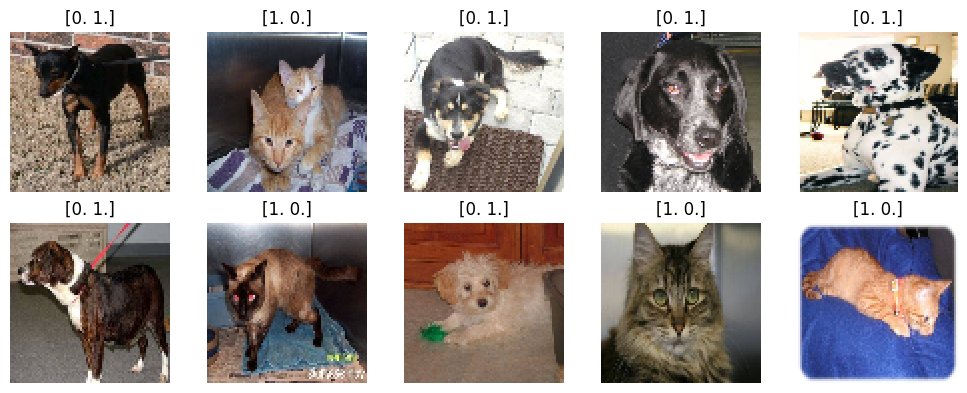

In [161]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    # resized_image = cv2.resize(image, new_size)
    ax.imshow(X_train[i])
    ax.axis("off")
    ax.set_title(f"{y_train[i]}")
fig.tight_layout()

ValueError: Data must be 1-dimensional, got ndarray of shape (357, 370, 3) instead

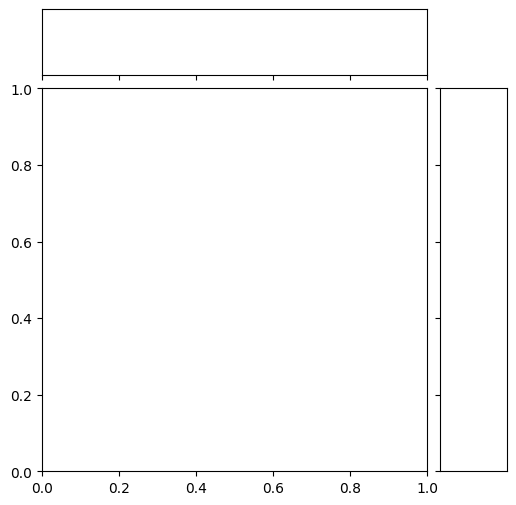

In [170]:
sns.jointplot(dog_images) # fixa flatten